# WHO Life Expectancy prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import random
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayushkumardas","key":"c601f083afe6a1de82c498faa3f4972b"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d kumarajarshi/life-expectancy-who

  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 70.8MB/s]


In [5]:
!unzip life-expectancy-who

Archive:  life-expectancy-who.zip
  inflating: Life Expectancy Data.csv  


In [6]:
data=pd.read_csv("/content/Life Expectancy Data.csv")

Data Cleaning

In [7]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
# Null values
data.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
data.dropna(subset=["Life expectancy "],inplace=True)

In [12]:
def imputer(data):
  for i in data:
    if type(data[i][1]) == np.float64 or type(data[i][1]) == np.int64 :
      data[i].fillna(data[i].mean(),inplace=True)


imputer(data)

In [13]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [14]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.390628e+07,4.396597,4.484890,0.205131,3.253691
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<Axes: >

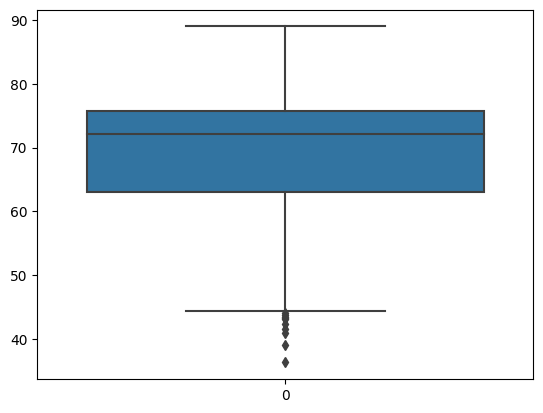

In [15]:
# Checking target value
sns.boxplot(data['Life expectancy '])

Removing outliers through quantile method

In [16]:
q1=data['Life expectancy '].quantile(0.25)
q3=data['Life expectancy '].quantile(0.75)
outer=q3+1*(q3-q1)
lower=q1-1*(q3-q1)
def remove_outlier(x):
  if(x>outer):
    return outer
  elif(x<lower):
    return lower
  return x
data['Life expectancy '] = data['Life expectancy '].apply(remove_outlier)

<Axes: >

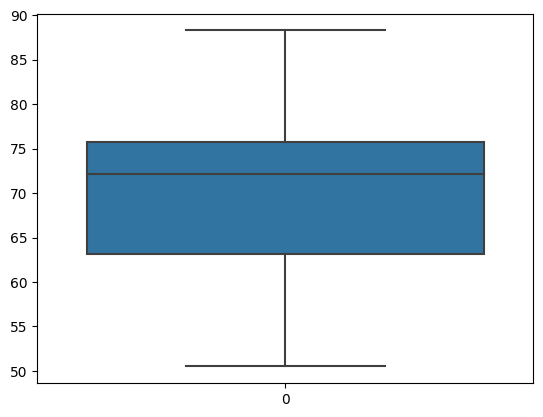

In [17]:
sns.boxplot(data['Life expectancy '])

The below graph infers that developed nations has a better life expectancy than developing nations

Text(0, 0.5, 'Life Expectancy')

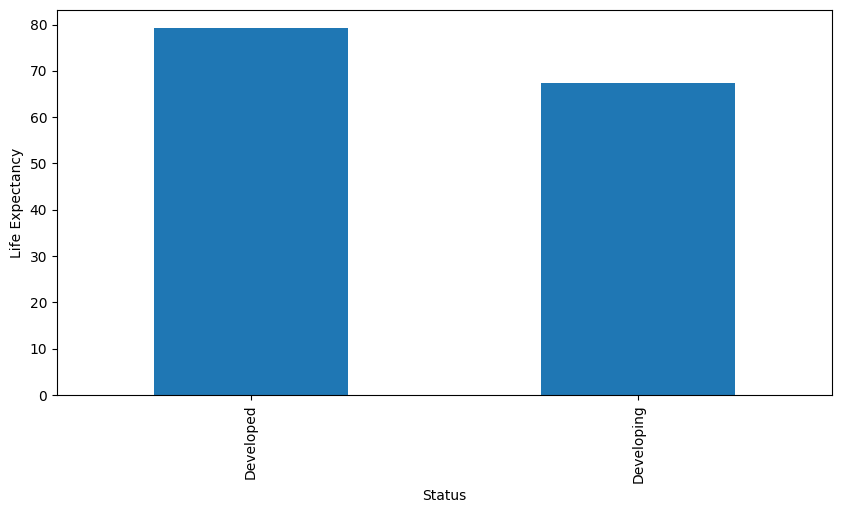

In [18]:
plt.figure(figsize=(10,5),dpi=100)
data.groupby('Status')['Life expectancy '].mean().plot(kind="bar")
plt.ylabel("Life Expectancy")

Observing the distribution of Life Expectancy

<ipython-input-19-c8df6915ed6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Life_expectancy, fit=norm, ax=ax1)


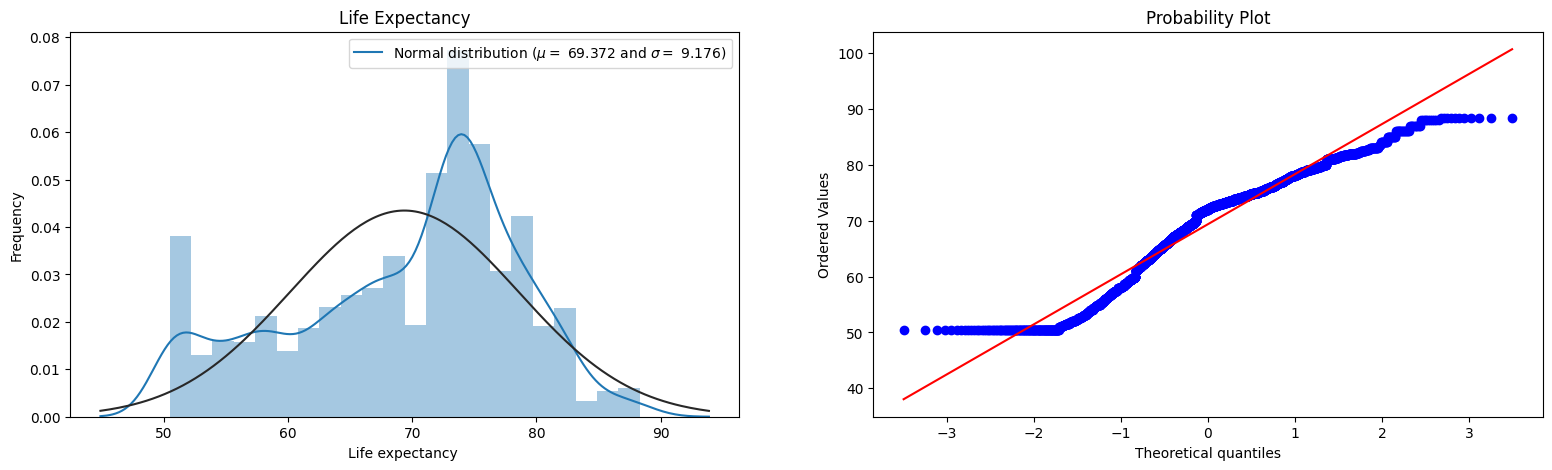

In [19]:
Life_expectancy=data['Life expectancy ']

(mu, sigma) = norm.fit(Life_expectancy)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(Life_expectancy, fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Life Expectancy')
ax2 = stats.probplot(Life_expectancy, plot=plt)
f.show()

<Axes: xlabel='Life expectancy ', ylabel='Count'>

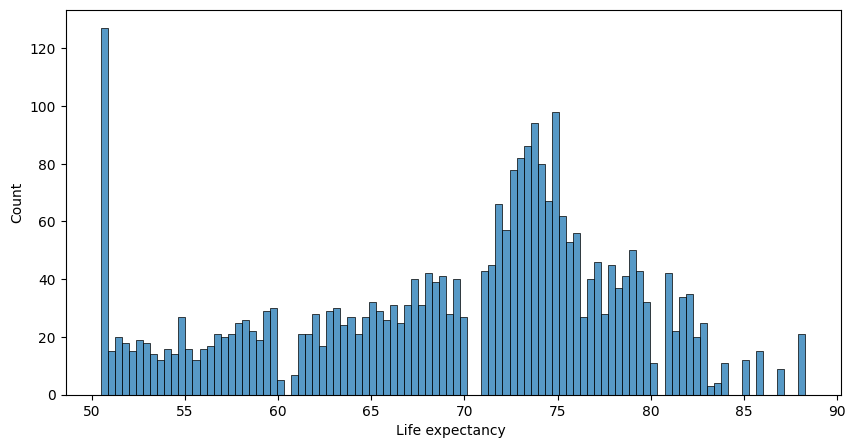

In [20]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(data['Life expectancy '],bins=100)

In [21]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Life expectancy has increased over the years as health facilities have improved

Text(0, 0.5, 'Life Expectancy')

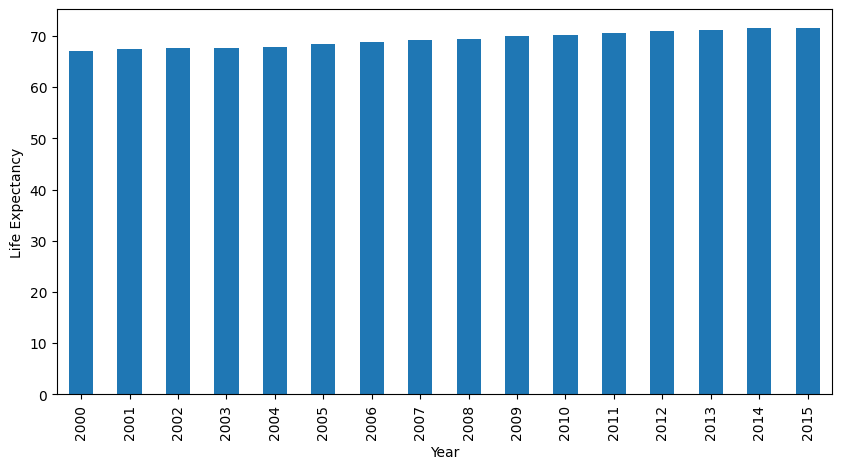

In [22]:
plt.figure(figsize=(10,5),dpi=100)
data.groupby('Year')['Life expectancy '].mean().plot(kind="bar")
plt.ylabel("Life Expectancy")

Using plotly.express to illustrate Country wise life expectancy over the years

In [23]:
# Country wise life expectancy
fig=px.line(data.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

For most of countries life expectancy has increased

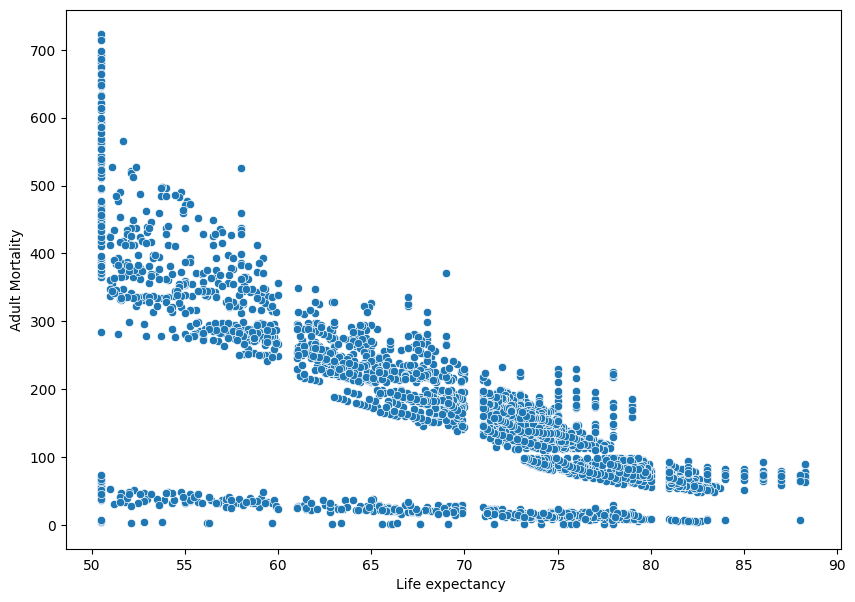

In [24]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(data=data,x='Life expectancy ',y='Adult Mortality')
plt.show()

Adult mortality is inversely correlated to life expectancy

In [25]:
data1=pd.DataFrame(data.groupby('Country')['Life expectancy '].mean().sort_values())
data1

,Life expectancy
Country,
Sierra Leone,50.75000
Angola,51.10625
Lesotho,51.15625
Central African Republic,51.25000
Côte d'Ivoire,51.41250
...,...
Italy,82.14375
Switzerland,82.33125
Iceland,82.44375


Country wise order of average life expectancy

Plotting the above data on globe using plotly.offline

In [26]:
# choropleth map
from plotly.offline import iplot
data3 = dict(type='choropleth',
            locations=data1.index,
            locationmode='country names',
            z=data1['Life expectancy '],
            text=data1.index,
            colorbar={'title': 'Life Expectancy'},
            colorscale=[[0, 'rgb(225,255,255)'],
                        [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,125,180)'],
                        [0.03, 'rgb(178,223,138)'], [0.10, 'rgb(51,160,44)'],
                        [0.30, 'rgb(251,144,143)'], [0.70, 'rgb(255,255,20)'],
                        [1, 'rgb(210,26,28)']],
            reversescale = False)
layout = dict(title="WHO Life expectancy",
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data3], layout=layout)
iplot(choromap, validate=False)

<ipython-input-27-da3feec0f9ed>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



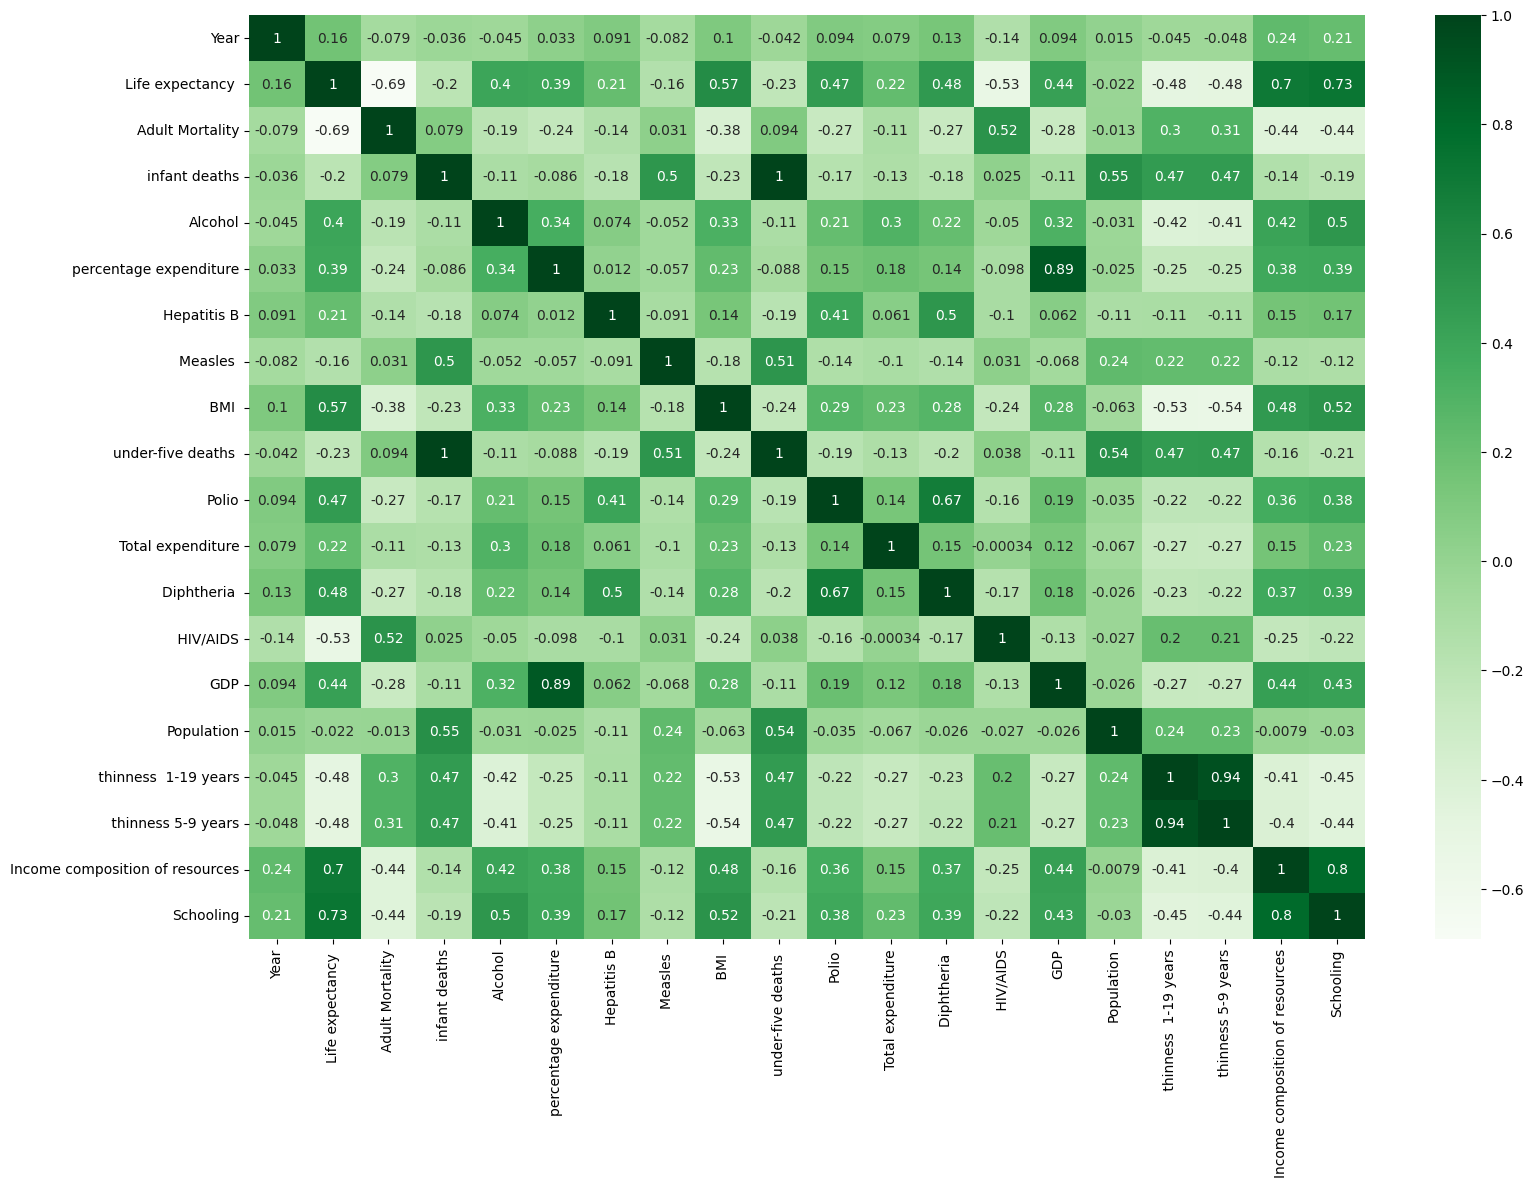

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

The above heatmap infers that:
1. Schooling, Income composition, GDP, Diptheria, Total expenditure, Polio, BMI, percentage expenditure, Alcohol and Year are positively correlated to life expectancy. Some of features might not be related in real life but in data it shows like Alcohol

2. Adult mortality, thinness, HIV/AIDS, Under 5 deaths, Measles are negatively correlated to life expectancy

In [28]:
# KS test
from scipy.stats import kstest
numerical_data=data.drop(["Life expectancy ","Country","Year"],axis=1)
numerical_data["Status"]=np.where(numerical_data["Status"]=="Developing",0,1)

for i in numerical_data:
  print("result for {} column is {}".format(i,kstest(numerical_data[i],'norm')))

result for Status column is KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
result for Adult Mortality column is KstestResult(statistic=0.9918195008754738, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)
result for infant deaths column is KstestResult(statistic=0.5742444035709464, pvalue=0.0, statistic_location=2, statistic_sign=-1)
result for Alcohol column is KstestResult(statistic=0.6414334841157909, pvalue=0.0, statistic_location=1.66, statistic_sign=-1)
result for percentage expenditure column is KstestResult(statistic=0.7668396579846813, pvalue=0.0, statistic_location=2.79096532, statistic_sign=-1)
result for Hepatitis B column is KstestResult(statistic=0.9982606784849428, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)
result for Measles  column is KstestResult(statistic=0.6094219991993618, pvalue=0.0, statistic_location=2, statistic_sign=-1)
result for  BMI  column is KstestResult(statistic=0.9811537226523659, pvalue=0.0, statistic

pvalue of every attribute is 0. We will try OLS to find out pvalues.

In [29]:
import statsmodels.api as sm
Y=Life_expectancy
x=numerical_data
x=sm.add_constant(x)
model=sm.OLS(Y,x)
results=model.fit()
print(results.summary())
# From the P values obtained we can drop 3 columns= Population,thinness 5-9 years,percentage expenditure

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     680.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:45:02   Log-Likelihood:                -8162.9
No. Observations:                2928   AIC:                         1.637e+04
Df Residuals:                    2908   BIC:                         1.649e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

OLS reveals that 3 columns (p>0.05) are thinness 5-9 years, Population, percentage expenditure
Dropping these 3 columns and performing KS test and OLS again

In [30]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [31]:
# KS test
from scipy.stats import kstest
data_drop = data[[' thinness 5-9 years','percentage expenditure','Population']]
numerical_data=data.drop(["Life expectancy ","Country","Year"],axis=1)
numerical_data2=numerical_data.drop(['Population',' thinness 5-9 years','percentage expenditure'],axis=1)
numerical_data2["Status"]=np.where(numerical_data2["Status"]=="Developing",0,1)

for i in numerical_data2:
  print("result for {} column is {}".format(i,kstest(numerical_data2[i],'norm')))

result for Status column is KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
result for Adult Mortality column is KstestResult(statistic=0.9918195008754738, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)
result for infant deaths column is KstestResult(statistic=0.5742444035709464, pvalue=0.0, statistic_location=2, statistic_sign=-1)
result for Alcohol column is KstestResult(statistic=0.6414334841157909, pvalue=0.0, statistic_location=1.66, statistic_sign=-1)
result for Hepatitis B column is KstestResult(statistic=0.9982606784849428, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)
result for Measles  column is KstestResult(statistic=0.6094219991993618, pvalue=0.0, statistic_location=2, statistic_sign=-1)
result for  BMI  column is KstestResult(statistic=0.9811537226523659, pvalue=0.0, statistic_location=2.5, statistic_sign=-1)
result for under-five deaths  column is KstestResult(statistic=0.5892717259753181, pvalue=0.0, statistic_location=2

Nothing seem to be changed here

In [32]:
Y=Life_expectancy
x=numerical_data2
x=sm.add_constant(x)
model=sm.OLS(Y,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     808.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:45:02   Log-Likelihood:                -8163.6
No. Observations:                2928   AIC:                         1.636e+04
Df Residuals:                    2911   BIC:                         1.646e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

But here p values have decreased

<Axes: xlabel='Population', ylabel='Count'>

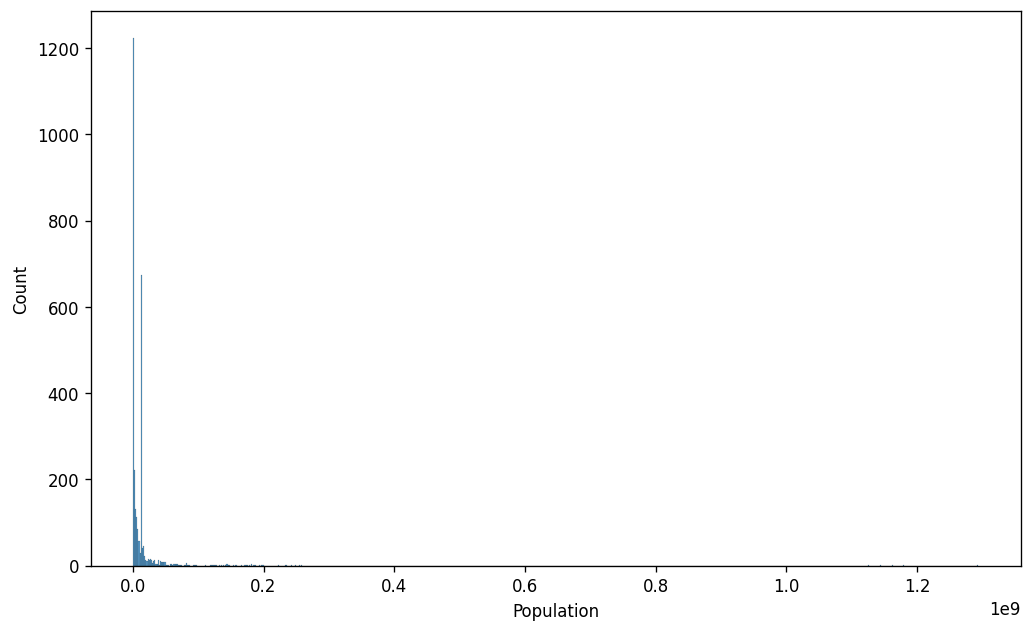

In [33]:
# Indentifying distribution for the columns removed
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(data_drop['Population'])

It is rightly skewed

<Axes: xlabel=' thinness 5-9 years', ylabel='Count'>

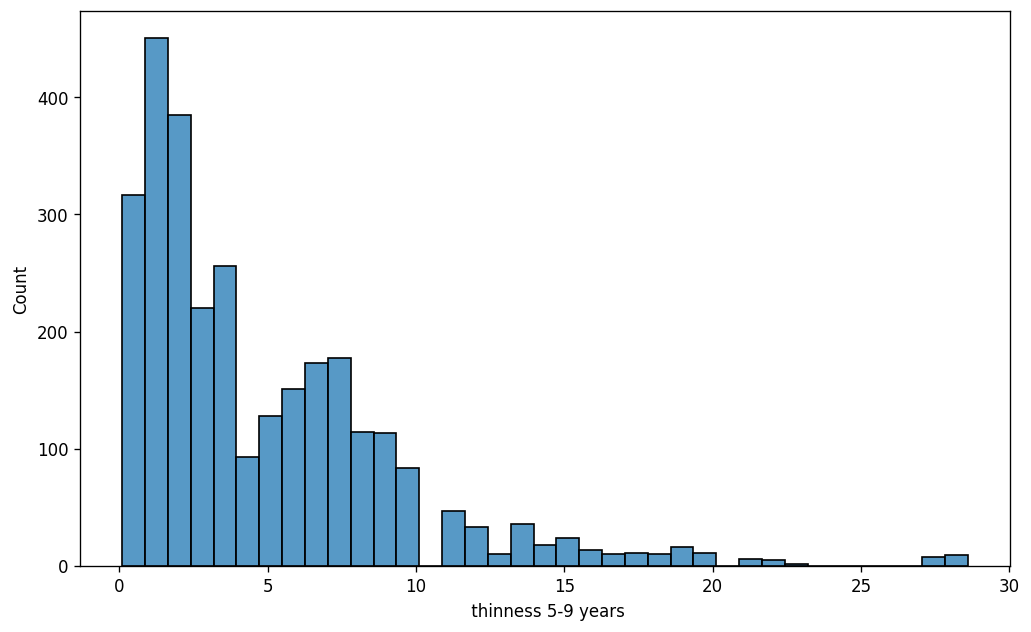

In [34]:
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(numerical_data[' thinness 5-9 years'])

It is also rightly skewed

<Axes: xlabel='percentage expenditure', ylabel='Count'>

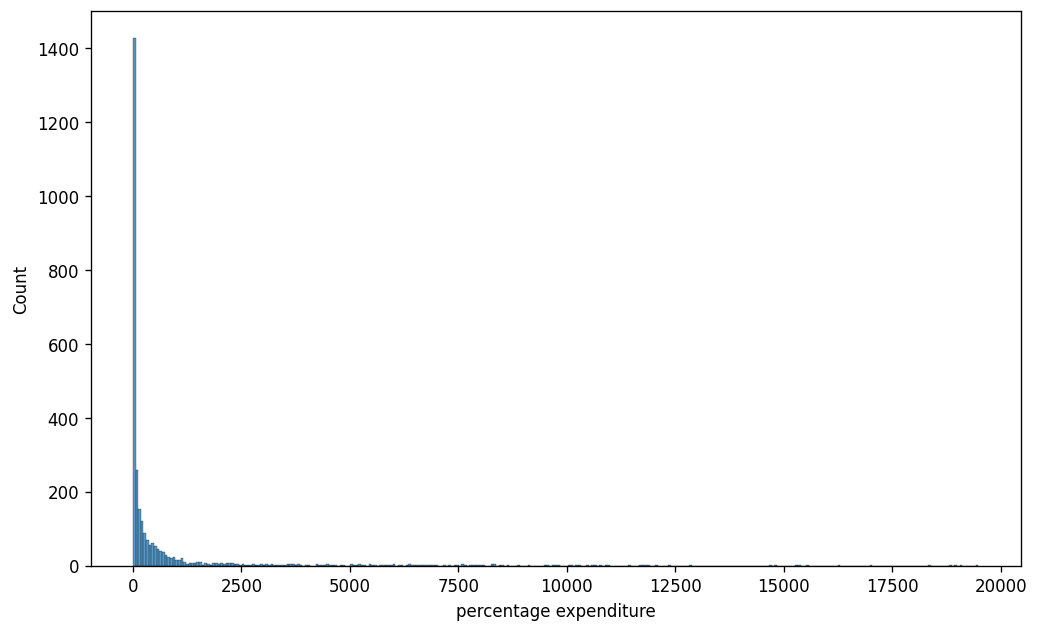

In [35]:
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(numerical_data['percentage expenditure'])

It is also rightly skewed

In [36]:
dict1={}
for i in range(0,183):
  dict1[data1.index[i]]=i+1


def priority(x):
  for j in dict1:
    if(j==x):
      return dict1[j]

data["Country"]=data["Country"].apply(priority)

In [37]:
# Scaling values of countries
def scale(x,x_min,x_max):
  return (x - x_min) / (x_max - x_min)

# Also from the graphs we can infer that the expectancy increases as year increases
data["Country_year"]=data["Country"]*data["Year"]
x_min = min(data["Country_year"])
x_max = max(data["Country_year"])
data["Country_year"] = data["Country_year"].apply(scale,args = (x_min,x_max))

As the year progresses life expectancy increases, so we will sort the countries in order of their life expectancy and multiply the year with it. It will serve as a new attribute for prediction of expectancy

In [38]:
list1=[data["Country_year"],numerical_data2]
data_scaled=pd.concat(list1,axis=1)
data_scaled.head()

,Country_year,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,0.170364,0,263.0,62,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1
1,0.170276,0,271.0,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,10.0
2,0.170189,0,268.0,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,9.9
3,0.170102,0,272.0,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,9.8
4,0.170015,0,275.0,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,9.5


In [39]:
data=pd.read_csv("/content/Life Expectancy Data.csv")

In [40]:
class SimpleImputer:
  def __init__(self):
    pass
  def fit(self, X ,y=None):
    self.X = X
    self.y= y
    self.X.dropna(subset=[y],inplace=True)
    for i in self.X:
      if type(data[i][1]) == np.float64 or type(data[i][1]) == np.int64 :
        self.X[i].fillna(self.X[i].mean(),inplace=True)
    self.transform(self.y)
    self.X["Status"]=np.where(self.X["Status"]=="Developing",1,2)
    dict1={}
    for i in range(0,183):
      dict1[self.X.index[i]]=i+1
    Life =self.X['Life expectancy ']
    self.X = self.X.drop(['Life expectancy '],axis = 1)
    self.X["Country"]=self.X["Country"].apply(priority)
    self.X["Country_year"]=self.X["Country"]*self.X["Year"]
    self.X = self.X.drop(["Country","Year",'Population',' thinness 5-9 years','percentage expenditure'],axis=1)
    return self.X,Life
  def transform(self, i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    outer=q3+1*(q3-q1)
    lower=q1-1*(q3-q1)
    self.X[i].apply(remove_outlier)
    return self


In [41]:
class StandardScaler:
  def __init__(self):
    pass
  def fit(self, X ,y):
    self.X = X
    self.y= y
    for i in self.X:
      self.transform(i)
    return self.X
  def transform(self, i):
      x_max = max(self.X[i])
      x_min = min(self.X[i])
      self.X[i] = self.X[i].apply(self.scale,args = (x_min,x_max))
      return self.X
  def mean(self,data):
    n = len(data)
    mean = sum(data) / n
    return mean

  def variance(self,data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance
  def standardize(self,x,mean , std):
    return (x - mean)/std

  def scale(self,x,x_min,x_max):
    return (x - x_min) / (x_max - x_min)


In [42]:
#Defining Pipeline

class Pipeline:
  def __init__(self,arr):
    self.imputer , self.scaler = arr
  def fit(self ,X,y=None):
    self.imputer = self.imputer[1]
    self.X,life = self.imputer.fit(X,y)
    self.scaler = self.scaler[1]
    self.X = self.scaler.fit(self.X,y)
    return self.X,life


In [43]:
def cross(data,life,k,v):
  size = data.shape[0] // k
  d = []
  y = []
  for i in range(k-1):
    d.append(data[i*size : (i+1)*size])
    y.append(life[i*size : (i+1)*size])
  d.append(data[(k-1)*size:])
  y.append(life[(k-1)*size:])
  test = d.pop(v)
  y_test = y.pop(v)
  train = pd.concat(d)
  y_train = pd.concat(y)
  return train,test,y_train,y_test

In [44]:
#Creating Pipelines

num_pipeline = Pipeline([
 ('imputer', SimpleImputer()),
 ('std_scaler', StandardScaler()),
 ])
data,life = num_pipeline.fit(data,"Life expectancy ")

In [45]:
from sklearn.metrics import r2_score
Y=life
k=10
x_train,x_test,y_train,y_test=cross(data,Y,k,random.randint(0,9))
model=Lasso(alpha=0.001)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_pred,y_test))


0.892594340530787


In [46]:
k =10
def cross(data,life,k,v):
  size = data.shape[0] // k
  d = []
  y = []
  for i in range(k-1):
    d.append(data[i*size : (i+1)*size])
    y.append(life[i*size : (i+1)*size])
  d.append(data[(k-1)*size:])
  y.append(life[(k-1)*size:])
  test = d.pop(v)
  y_test = y.pop(v)
  train = pd.concat(d)
  y_train = pd.concat(y)
  return train,test,y_train,y_test


for i in range(k):
  t1,t2,y_train,y_test = cross(data,Y,k,i)
  model=Lasso(alpha=0.001)
  model.fit(t1,y_train)
  y_pred = model.predict(t2)
  error = np.sqrt(sum((y_pred - y_test)**2) / len(y_pred))
  print(error)


2.6721253655953277
2.900594633233858
2.5246395749908777
2.916905730086842
2.6728831946958467
2.3587465223812965
2.455669483081665
3.3760763419106534
3.1348725508039874
2.8473097569650676


In [47]:
from sklearn.metrics import mean_absolute_percentage_error
for i in range(k):
  t1,t2,y_train,y_test = cross(data,Y,k,i)
  model=Lasso(alpha=0.001)
  model.fit(t1,y_train)
  y_pred = model.predict(t2)
  error = mean_absolute_percentage_error(y_pred,y_test)
  print(error)

0.030220872347684755
0.038249565043363826
0.027133752080806928
0.0301746892891624
0.027832127589451833
0.02606090696787778
0.02958142087675841
0.03394372176969433
0.03986073633004868
0.031933187784051804
